# **Librería de visualización de datos estadísticos: *Seaborn***
---

![logo.png](https://raw.githubusercontent.com/mwaskom/seaborn/b528ba272e2995c390fc84f13a49dd8de801121b/doc/_static/logo-wide-lightbg.svg)

***Seaborn*** es una librería de *Python* orientada a la construcción de visualizaciones de datos estadísticos. Está basada y construida con *Matplotlib*. Permite crear visualizaciones estadísticas complejas directamente desde objetos de *NumPy* y *Pandas*. Crea visualizaciones muy atractivas con gran facilidad gracias a sus diferentes estilos. Además, es especialmente útil para visualizaciones donde se involucran datos categóricos.

Para mayor información acerca del proyecto ingrese a la página web oficial de [*Seaborn*](http://seaborn.pydata.org/).
    


## **0. Importar *Seaborn***
---

En caso de ser necesario se puede instalar el módulo *Seaborn* con el siguiente comando de consola:

    pip install seaborn
    
Se recomienda trabajar con la versión estable más actualizada. Para esto, podría ser necesario actualizar la versión:

In [1]:
#!pip install seaborn --upgrade

Por convención *Seaborn* se importa con el alias **`sns`**.

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# Configuraciones de Matplotlib
%matplotlib inline   
# plt.rcParams['figure.dpi'] = 110

In [3]:
# Estilo por defecto para notebooks.
sns.set_theme('notebook')

## **1. Conjuntos de datos**
---
*Seaborn* tiene por defecto algunos *datasets* populares incorporados que podremos usar para la presentación de ejemplos. Uno de ellos es el dataset ***tips*** el cual almacena datos referentes a propinas dadas por clientes en un restaurante y algunos datos relacionados. Usaremos este *dataset* para algunas demostraciones en el transcurso de esta guía.

Inicialmente cargamos el *dataset* **`tips`** en la variable tips, el dataset es "cargado" mediante la función **`load_dataset()`** de *Seaborn*. Este *dataset* contiene información acerca de propinas en un restaurante de Estados Unidos. Este contiene las siguientes columnas:

| Variable | Definición	| Valores | 
| --- | --- | --- |
| total_bill   | 	Costo total de la factura. (USD) | 	|
| tip          	| Propina voluntaria. (USD) | 	
| sex 	| Sexo de la persona que paga la factura. 	| Female, Male |
| smoker |	Si se tiene o no un fumador en el grupo de comensales. 	| No, Yes  |
| day |	Día de la semana. (De jueves a domingo) | Thur (Jueves), Fri (Viernes) , Sat (Sábado), Sun (Domingo) |
| time |	Si es durante el almuerzo o la cena.	| Dinner (Cena), Lunch (Almuerzo) |
| size |	Cantidad de comensales en la mesa. | |	

In [4]:
tips = sns.load_dataset('tips') # Retorna un DataFrame de pandas.

In [5]:
tips.info()   # visualizamos la cabecera del dataset 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [6]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
tips['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

El argumento de la función **`load_dataset()`** recibe el nombre del dataset deseado. Este nombre debe corresponder a la lista de *dataset* disponibles en el siguiente [repositorio de Github](https://github.com/mwaskom/seaborn-data). Algunos de ellos ya han sido utilizados en unidades anteriores, como los dataset **`titanic`**, **`iris`** y **`anscombe`**. Puede adicionalmente 
conocer la lista de *datasets* disponible en la versión de *Seaborn* con el método **`sns.get_dataset_names`**.

In [8]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

## **2. Visualizaciones relacionales**
---

*Seaborn* cuenta con visualizaciones comunes para explorar la relación de variables. Estos se han visto previamente en la visualización con *Pandas* y *Matplotlib*, con una menor capacidad de personalización rápida. Los métodos usados para la visualización relacional son:

* **`scatterplot`**
* **`lineplot`**
* **`relplot`**

### **2.1. Método `scatterplot`**
---

El método **`scatterplot`** corresponde al diagrama de dispersión. Las funciones de visualización básicas de *Seaborn* son generadas con un único llamado a la función, definiendo la personalización a partir de sus argumentos.

El ejemplo siguiente genera el diagrama de dispersión relacionando la columna **`'total_bill'`** y la columna **`'tip'`** del *DataFrame* **`tips`**.


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

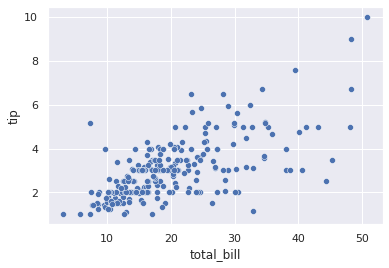

In [9]:
sns.scatterplot(data=tips,        # Conjunto de datos
                x="total_bill",   # Variable del eje X              
                y="tip")          # Variable del eje Y   

Nótese que el objeto generado en el llamado de esta función es un objeto **`Axes`** de *Matplotlib*. Esto quiere decir que podríamos asignarle un nombre y personalizar mucho más la figura mediante instrucciones de *Matplotlib* como veremos más adelante. 

En el mismo llamado de la función se pueden añadir más codificaciones y detalles para la visualización. Por ejemplo, para utilizar el tono de color para codificar una tercera variable categórica se puede indicar el argumento **`hue`** y para codificar con el estilo del marcador se puede indicar con el argumento **`style`**.

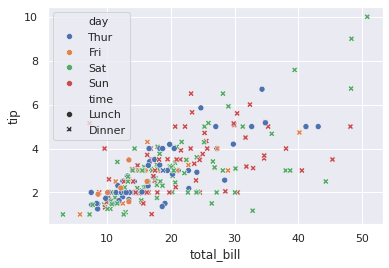

In [10]:
sns.scatterplot(data=tips, x="total_bill", y="tip",
                hue="day",      # Tono de color
                style="time");   # Estilo del marcador.

### **2.2. Método `lineplot`**
---

El método **`lineplot`** corresponde al diagrama de líneas. Este funciona de manera similar que el método anterior, con la definición de variables a partir de argumentos.

A diferencia de otros métodos de visualización, *Seaborn* permite inferir ideas de visualización como la agregación a partir de la media, además de visualizar el intervalo de confianza asociado (con un nivel de confianza del $95\%$).

Por ejemplo, al relacionar la cantidad de comensales **`size`** con la propina dada **`tip`** se agregan las instancias de cada grupo de tamaños a partir de la media de la variable del eje $y$.

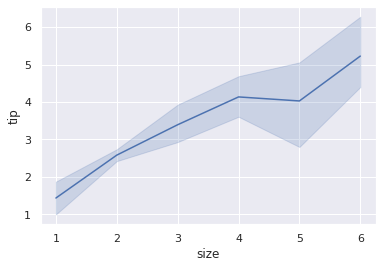

In [11]:
sns.lineplot(data = tips, x = 'size', y = 'tip');

Al igual que antes es posible definir el tono de color y el estilo de marcador a partir de variables determinadas:

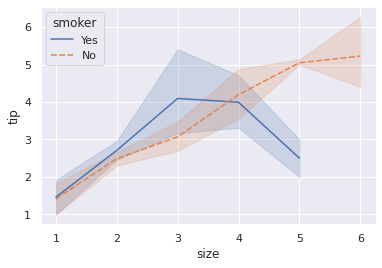

In [12]:
sns.lineplot(data = tips, x = 'size', y = 'tip', hue ='smoker', style = 'smoker');

Además, se puede definir información importante como el estilo de la representación del error y el valor de confianza asociado.

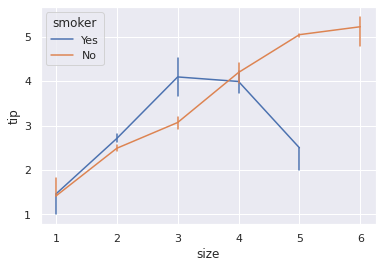

In [13]:
sns.lineplot(data = tips, x = 'size', y = 'tip', hue ='smoker', 
              err_style= 'bars',    # Barras de error en vez de áreas.
              errorbar = ('ci', 50));             # Intervalo de confianza con un nivel del 50%

### **2.3. Método `lmplot`**
---
*Seaborn* viene con funcionalidades para graficar los modelos de regresiones lineales. El método **`lmplot`** permite visualizar modelos lineales, pero también permite dividir los gráficos en función de las características, así como colorear el tono en función de éstas.


Iniciamos con el diagrama de regresión lineal para las variables **`total_bill`** y **`tips`** del *DataFrame* **`tips`**:



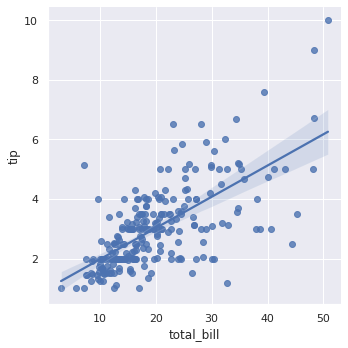

In [14]:
sns.lmplot(x = 'total_bill', y = 'tip', data = tips);

Es posible realizar la relación lineal para distintas categorías sobre un mismo diagrama. En el caso siguiente, veremos cómo podemos obtener la línea de regresión lineal y las parejas de datos de manera independiente para los casos de hombres y mujeres. Esto se logra con la definición del parámetro **`hue`** con el valor **`'sex'`**.

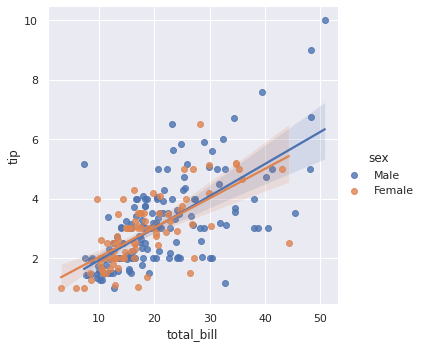

In [15]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex');

Es posible igualmente personalizar la gráfica definiendo diferentes tipos de marcadores, de acuerdo a los [soportados por *Matplotlib*](http://matplotlib.org/api/markers_api.html), y también hacer uso de una paleta de tonos diferente a la usada por defecto. Para ello se deben definir los parámetros **`palette`** y **`markers`** como se ilustra en el ejemplo:

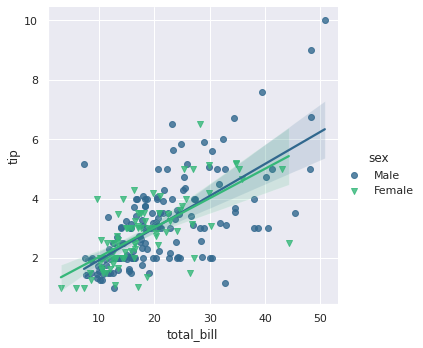

In [16]:
sns.lmplot(x='total_bill',
           y='tip',
           data=tips,
           hue='sex',
           palette='viridis',
           markers=['o','v']);

Si se quiere modificar otros parámetros de *Matplotlib* más específicos como el tamaño del marcador, es necesario pasar esta información como un parámetro adicional en forma de diccionario.

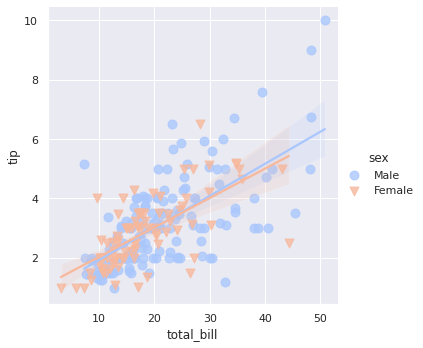

In [17]:
sns.lmplot(x='total_bill',
           y='tip',
           data=tips,
           hue='sex',
           palette='coolwarm',
           markers=['o','v'], # Tipos de marcadores usados en la visualización.
           scatter_kws={'s':80}); # scatter_kws (Scatter keywords). Argumentos de los marcadores de Matplotlib.

Los argumentos *kwargs* de **`lmplot`** pasan a **`regplot`** que es una forma más general. **`regplot`** tiene un parámetro **`scatter_kws`** que se pasa a su vez a **`plt.scatter`**. Entonces, si se quiere establecer el parámetro **`'s'`**, que corresponde al tamaño del marcador, es necesario modificar este argumento en el diccionario. 
En otras palabras, en varias funciones de *Seaborn* se pasan los argumentos base a una función de *Matplotlib* por medio de argumentos de la forma **`*_kws`**. Si quiere conocer los detalles se recomienda consultar la [documentación de marcadores de *Matplotlib*](http://matplotlib.org/api/markers_api.html).


Podemos separar aún más las representaciones de los modelos lineales añadiendo una cuadrícula para analizar variables específicas. Simplemente hay que indicar los argumentos **`col`** o **`row`**. En el siguiente caso las gráficas se generan a partir de las categorías de la variable **`sex`**.

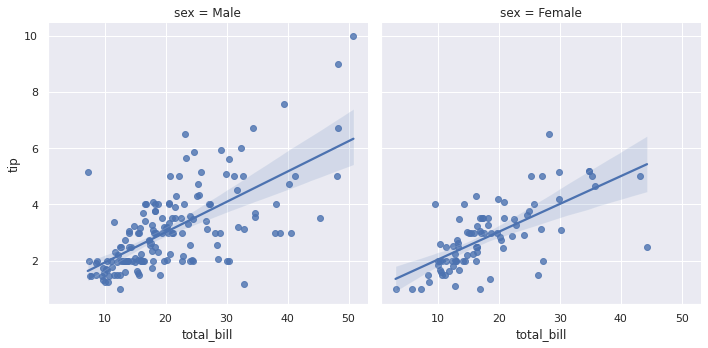

In [18]:
sns.lmplot(x='total_bill', y='tip', data=tips, col='sex');

Adicionalmente, también se pueden asignar las filas para clasificar por otra categoría. En el siguiente caso las columnas continúan siendo clasificadas por la variable **`sexo`** pero adicionalmente en las filas se hace la clasificación por la columna **`time`**:

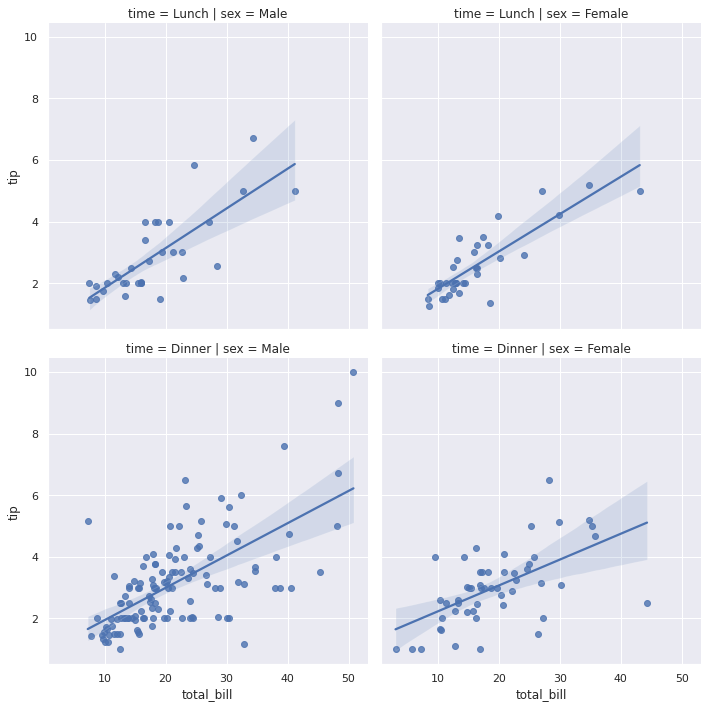

In [19]:
sns.lmplot(x="total_bill", y="tip", col="sex", row="time", data=tips);

Es posible también combinar el uso de **`col`**, y **`row`** con el uso de **`hue`** para lograr así visualizar una mayor cantidad de información:

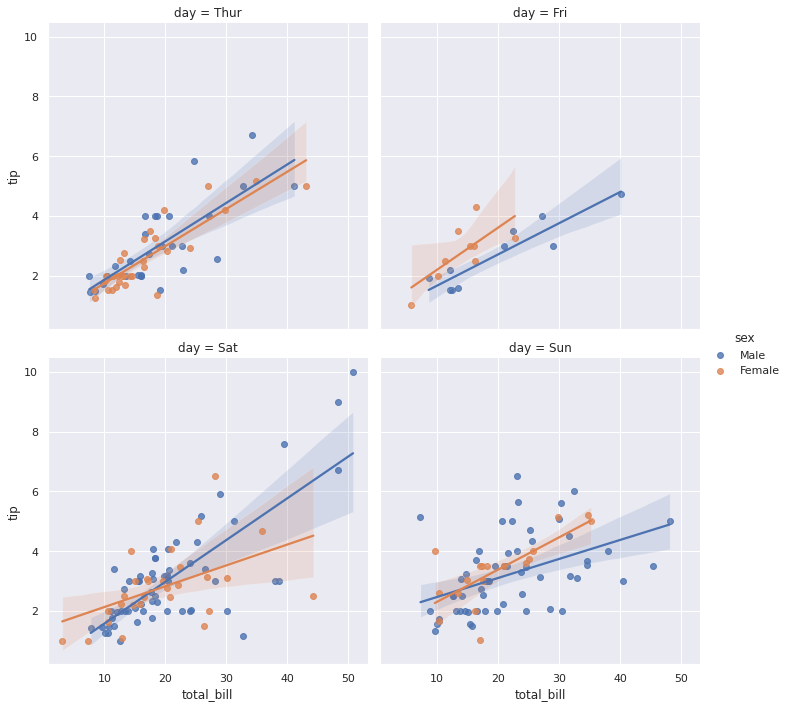

In [20]:
sns.lmplot(x='total_bill', y='tip', data=tips, 
           col='day', col_wrap = 2,
           hue='sex', palette='deep'); #row="time");

Las figuras de *Seaborn* pueden ajustarse en tamaño y relación de aspecto con los parámetros **`size`** y **`aspect`**:

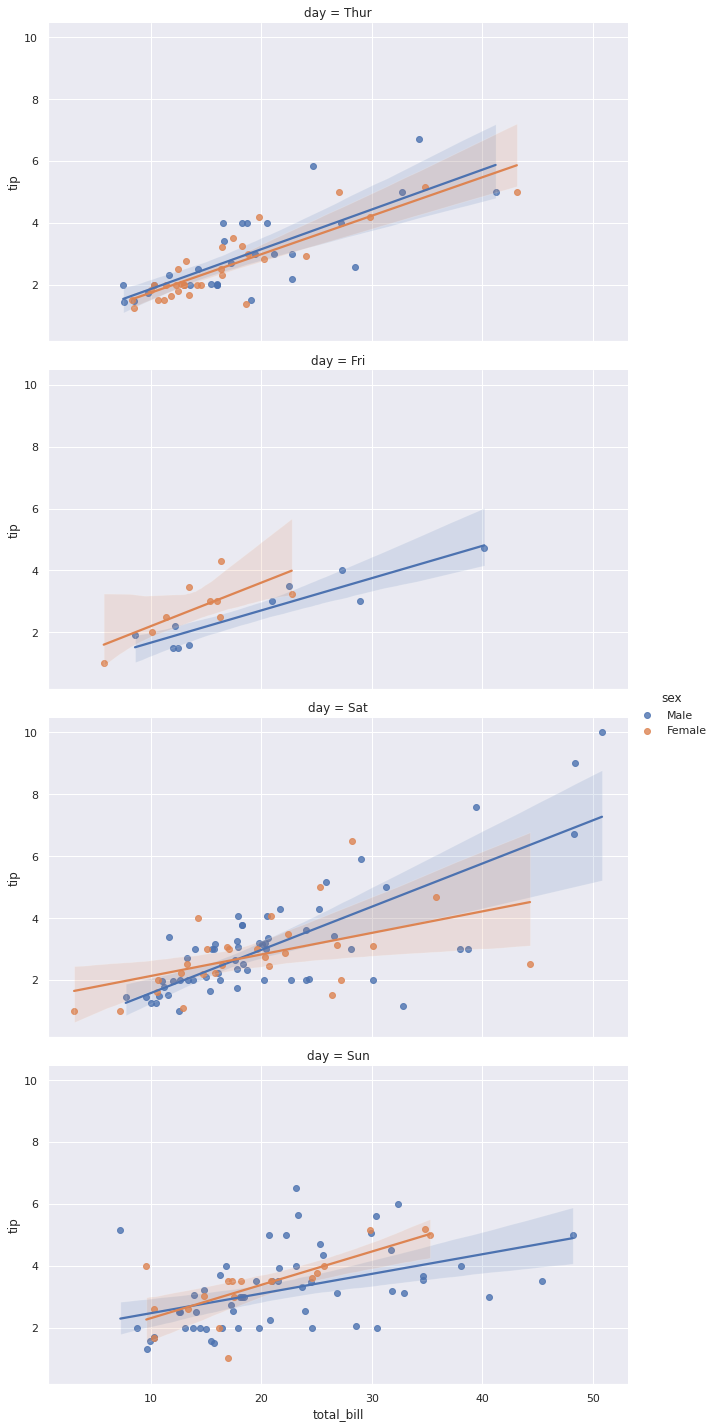

In [21]:
sns.lmplot(x='total_bill',
           y='tip',
           data=tips,
           row='day',
           hue='sex',
           palette='deep',
           aspect=1.8,
           height=5);

### **2.4. Método `relplot`**
---

En *Seaborn* existen categorías de visualización que son agrupadas en funciones generales. Para el caso de las funciones relacionales se dispone de la función **`relplot`** que, entre otras cosas, permite codificar a partir de filas y columnas en gráficas conformando una cuadrícula. Algunos argumentos importantes son:

Por medio del argumento **`kind`** se puede definir el tipo de visualización (**`'scatter'`** o **`'line'`**).

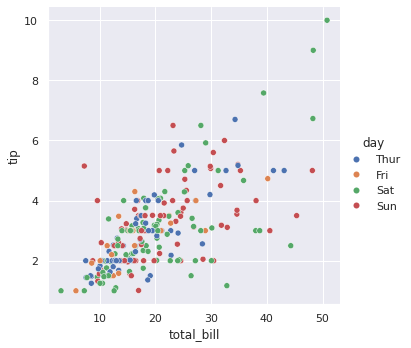

In [22]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", 
            kind = 'scatter') # Gráfica relacional de dispersión.

Note que ahora el objeto retornado es un objeto de *Seaborn* conocido como **`FacetGrid`**. Este representa una cuadrícula de gráficas, como se verá más adelante en este material. Para representar variables como filas o columnas se puede usar el argumento **`col`** y **`row`**.

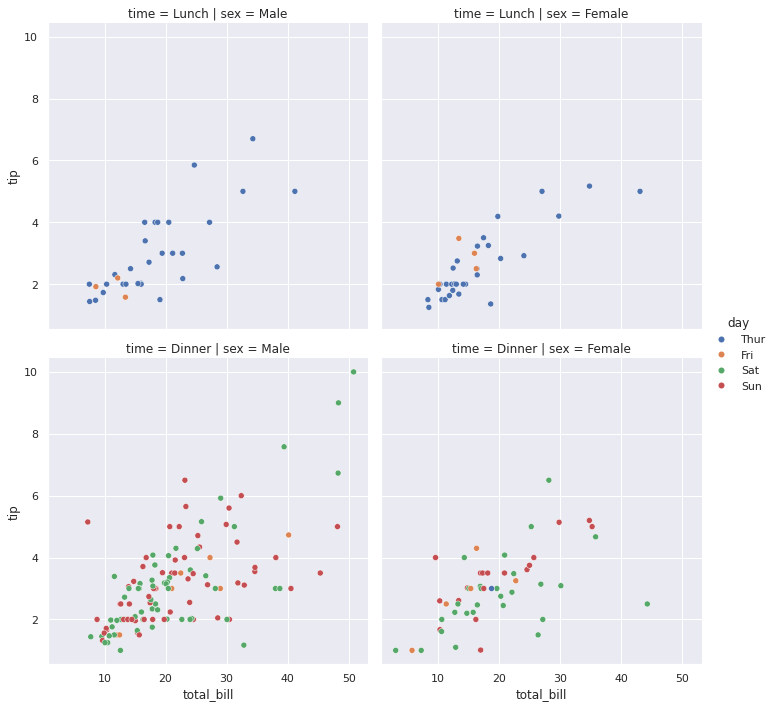

In [23]:
sns.relplot(data=tips, x="total_bill", y="tip", hue="day", kind = 'scatter',
            col = 'sex',
            row = 'time'           
            );

## **3. Visualización de distribuciones**
---


Otra categoría importante que distingue *Seaborn* es la de visualización de distribuciones. A continuación se presentan algunos tipos de gráficos de *Seaborn* útiles para visualizar la distribución de datos numéricos. Estos son:

* **`distplot`**
* **`jointplot`**
* **`pairplot`**
* **`rugplot`**
* **`kdeplot`**

### **3.1. Método `histplot`**
---

El método **`histplot`** muestra la distribución de un conjunto de observaciones de una variable numérica. El diagrama generado es un histograma con los valores presentes en la columna del *DataFrame* o el objeto *Series* que se pasa en el argumento.

El ejemplo siguiente diagrama el histograma para la columna **`'total_bill'`** del *DataFrame* **`tips`**.

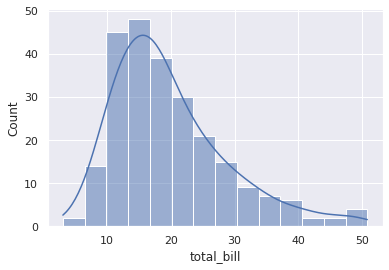

In [24]:
sns.histplot(tips['total_bill'], kde=True);

Con el argumento **`kde`** se presenta en la figura la línea de **Estimación de Densidad de Kernel (KDE)**, muy útil para representar una aproximación a la **función de densidad de probabilidad** del conjunto de datos representado.


**`histplot`** admite varios parámetros para la personalización de la gráfica. Por ejemplo, con el argumento **`bins`** se puede establecer el número de barras (intervalos de clase) a mostrar en el histograma. Por defecto, este valor es generado con la regla **[Freedman-Diaconis](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule)**. En el siguiente ejemplo se define un número de intervalos de clase específico:

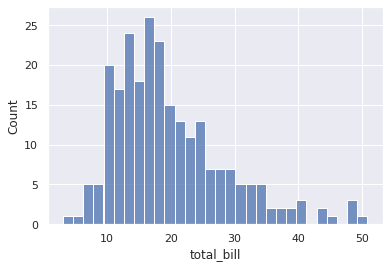

In [25]:
sns.histplot(tips['total_bill'], 
             kde=False,
             bins=30);

### **3.2. Método `jointplot`**
---

El método **`joinplot`** permite diagramar la relación entre dos columnas numéricas de un *dataset*. Por ejemplo, si se quisiera mostrar una relación comparativa de la propina entregada con respecto al valor total de la factura, usaríamos la función **`joinplot`** de la siguiente manera:



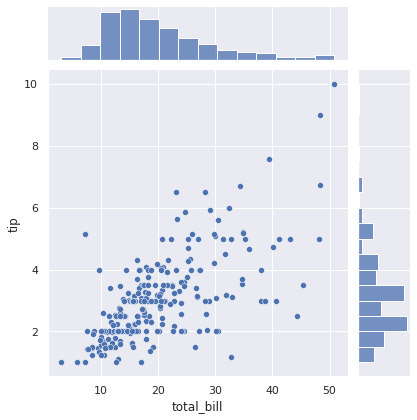

In [26]:
#se define la columna a diagramar en cada uno de los dos ejes,
# y el dataset correspondiente (data)

sns.jointplot(x='total_bill', 
              y='tip', 
              data=tips);

El resultado es una gráfica **`histplot`** (histograma) por cada eje, y un diagrama de dispersión o **`scatter`** que permite la interpretación de esta relación. Por ejemplo en la gráfica anterior se puede interpretar que a un mayor valor del total de la factura, se tiene un mayor valor de propina.

Por defecto el diagrama de la relación se realiza con una visualización tipo **`scatter`**, sin embargo **`jointplot()`**  permite hacer esta representación con otros diagramas mediante la definición del parametro **`kind`** el cual puede ser de los siguientes tipos:
  * **`'scatter'`** (por defecto)
  * **`'reg'`**
  * **`'resid'`**
  * **`'kde'`** 
  * **`'hex'`**

Las siguientes celdas muestran el resultado de usar la función **`jointplot()`** con distintas formas de diagramar la relación entre las columnas:

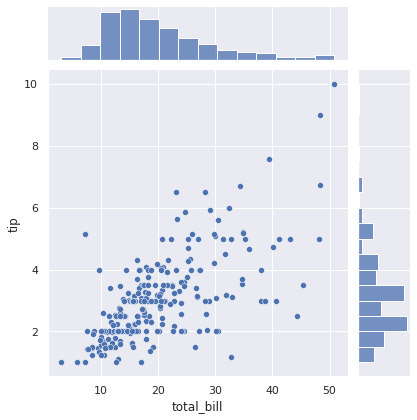

In [27]:
# scatter: El mismo resultado anterior, pues 'scatter' es el modo por defecto.
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter');

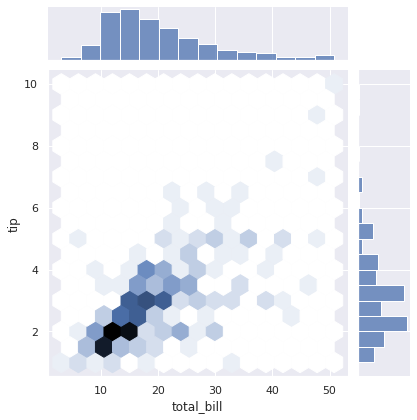

In [28]:
# hex: Se representa la relación con hexágonos, a mayor densidad de puntos, 
# más oscuro se presenta el hexágono correspondiente.
# Esto es muy útil cuando tenemos una gran cantidad de datos (alta densidad) 

sns.jointplot(x='total_bill',y='tip',data=tips,kind='hex');

Podemos adicionar un objeto **`colorBar`** usando *Matplotlib*:

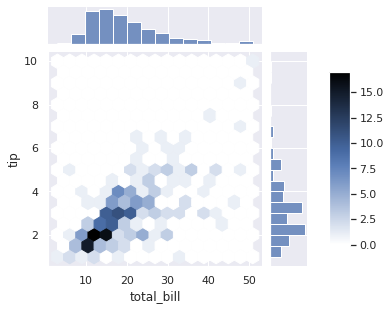

In [29]:
# Ponemos el nombre 'hexplot' al objeto retornado por Seaborn. 
# Esto nos permitirá personalizar aspectos de la visualización usando Matplotlib.
hexplot = sns.jointplot(x=tips["total_bill"], y=tips["tip"], kind="hex") 

plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2)  #Reducimos el tamaño de la figura original para darle espacio al colorBar.

# Construimos un nuevo Axes para el colorBar.
cbar_ax = hexplot.fig.add_axes([.85, .25, .05, .4])  # x, y, ancho, alto
plt.colorbar(cax=cbar_ax)
plt.show()

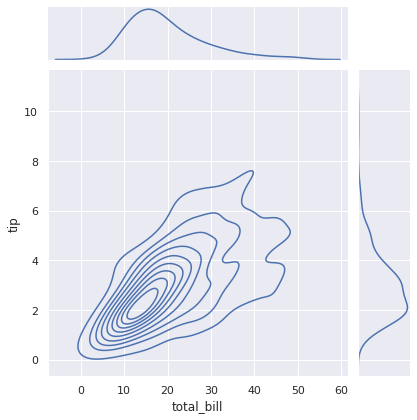

In [30]:
# kde: Se representa con un diagrama de densidades bidimensional
sns.jointplot(x='total_bill', y='tip', data=tips, kind='kde');

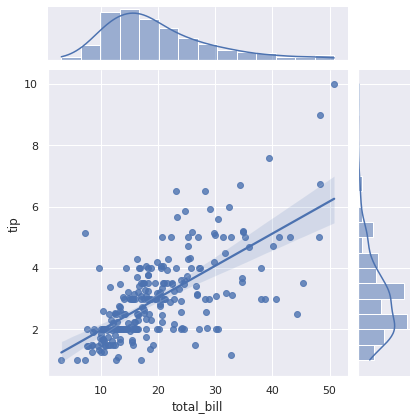

In [31]:
# reg: Es básicamente el diagrama de tipo scatter, pero se incluye la línea de regresión lineal con su intervalo de confianza.
sns.jointplot(x ='total_bill',
              y ='tip',
              data = tips,
              kind = 'reg');

Si queremos que aparezca la ecuación de la regresión lineal, podemos calcular sus coeficientes y añadirlos como una etiqueta:

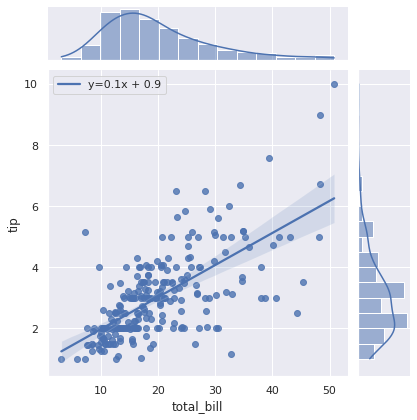

In [32]:
from scipy import stats

#Se calcula la regresión usando scipy.
pendiente, intercepto, r_value, p_value, std_err = stats.linregress(tips['total_bill'],tips['tip'])

ax = sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg', 
                  line_kws={'label':"y={0:.1f}x + {1:.1f}".format(pendiente, intercepto)})

ax.fig.axes[0].legend()
plt.show()

### **3.3. Método `pairplot`**
---

**`pairplot`** grafica las distribuciones comparando relaciones entre todas las variables númericas del DataFrame. Para esto, el método genera un diagrama para cada combinación posible de dos columnas numéricas contenidas en el *DataFrame* que recibe como parámetro.


In [33]:
tips.select_dtypes('number').columns

Index(['total_bill', 'tip', 'size'], dtype='object')

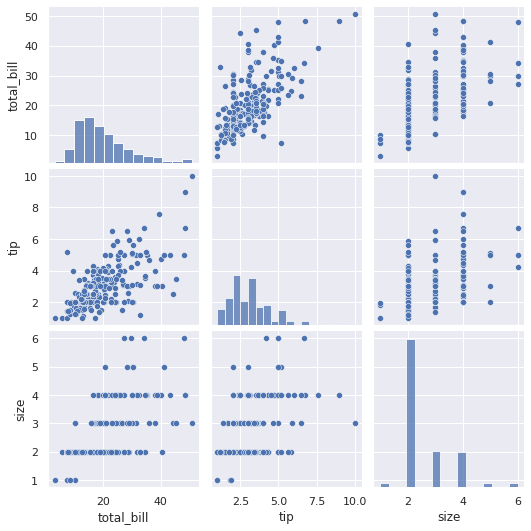

In [34]:
sns.pairplot(tips);

El resultado anterior es un diagrama construido por cada par de variables numéricas relacionadas. En cada eje se encuentran representadas cada una de las columnas numéricas del *DataFrame*, y en el cruce de éstas, la gráfica correspondiente a su relación en un diagrama de dispersión o *scatter*. Como se muestra en el resultado, en los casos en que se cruza la variable consigo misma (diagonal), se presenta el histograma correspondiente a esa variable.

Adicionalmente en el llamado a **`pairplot`** se puede incluir el parámetro **`hue`** (tono) con el que se puede especificar una categorización o clasificación de acuerdo a una columna categórica del mismo *DataFrame*. 

En el siguiente ejemplo se especifica el argumento **`hue`**. De esta manera las gráficas resultantes clasificarán los resultados mediante colores distintos para cada valor de la columna **`'sex'`** en el *DataFrame*, en este caso los valores **`'male'`** y **`'female'`**. 


> **Nota:** Entre más codificaciones se realicen, mayor costo computacional tiene la visualización y más tardará en generarse. 

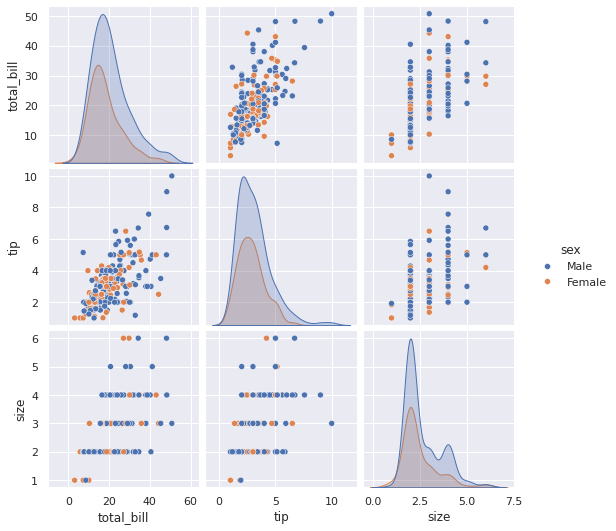

In [35]:
# Si queremos usar histogramas en la diagonal, usar el parámetro: diag_kind='hist'
sns.pairplot(tips, hue='sex');

El uso del parámetro **`palette`** permite establecer un estilo de colores predefinido para la gráfica. En la [documentación](https://seaborn.pydata.org/tutorial/color_palettes.html) de *Seaborn* podrá encontrar los estilos de color disponibles, algunas opciones son:
**`coolwarm`, `deep`, `muted`, `bright`, `pastel`, `dark`, `colorblind`**.

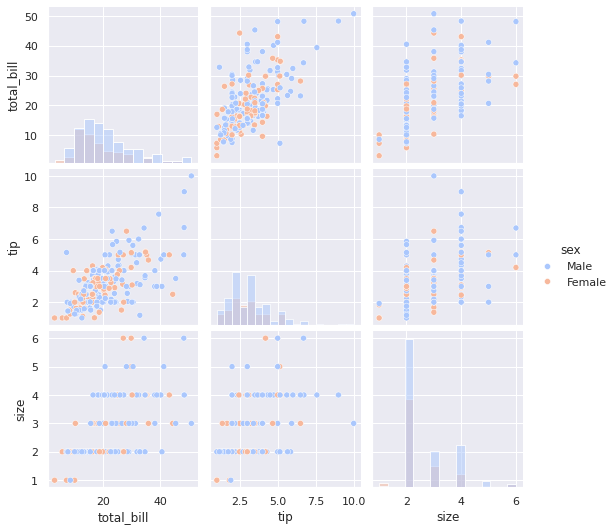

In [36]:
sns.pairplot(tips, 
             diag_kind = 'hist', # Tipo de diagrama de distribución.
             hue='sex', 
             palette='coolwarm');

### **3.4. Método `rugplot`**
---

**`rugplot`** permite una representación gráfica de la distribución de los valores de una columna numérica. Consiste básicamente en la gráfica de los valores de la variable a lo largo de un solo eje, representando su distribución mediante densidades. Podría interpretarse como un tipo de diagrama **scatter** de una sola dimensión, es decir, sobre un solo eje. 

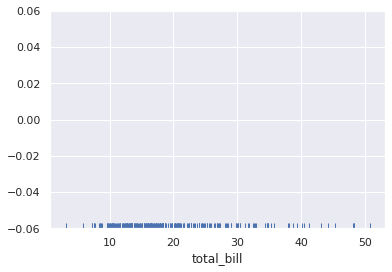

In [37]:
sns.rugplot(tips['total_bill']);

**`rugplot`** permite la personalización de la gráfica mediante uso de distintos parámetros. Por ejemplo, es posible definir el eje sobre el cual se desea diagramar, así como la elevación o altura del diagrama con los parámetros **`x`**, **`y`**  y **`height`**,  respectivamente.

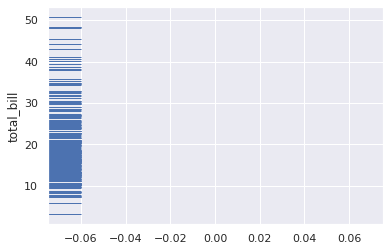

In [38]:
sns.rugplot(y = tips['total_bill'], height=0.1);

### **3.5. Método `kdeplot`**
---

Los *KDE plots* son [gráficos de Estimación de Densidad del Kernel](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). Estas representaciones de *KDE* reemplazan cada observación con una distribución Normal o *Gaussiana* centrada a su alrededor.

La función **`kdeplot`** grafica básicamente un diagrama de densidad de probabilidad estimado de la variable. La densidad de las observaciones sobre un eje se representa como la altura sobre el otro eje. 

El siguiente diagrama usa **`kdeplot`** para graficar la distribución de los valores de la columna **`total_bill`**.


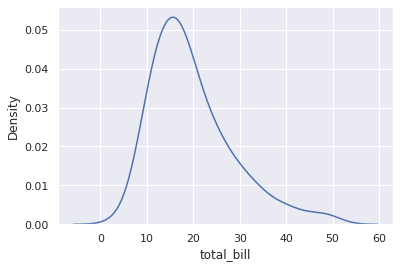

In [39]:
sns.kdeplot(tips['total_bill']);

Se pueden interpretar o conceptualizar mejor los diagramas generados por **`kdeplot`** y **`rugplot`** si los dibujamos sobre una misma gráfica. En la siguiente celda se visualizan los dos tipos de diagramas sobre una misma gráfica para las columnas **`'tip'`** y **`'total_bill'`**.

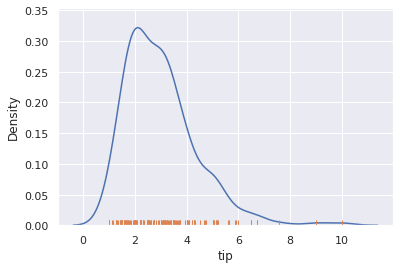

In [40]:
sns.kdeplot(tips['tip']);  # diagrama tipo kdeplot para la columna propinas
sns.rugplot(tips['tip']);  # diagrama tipo rugplot para la columna propinas

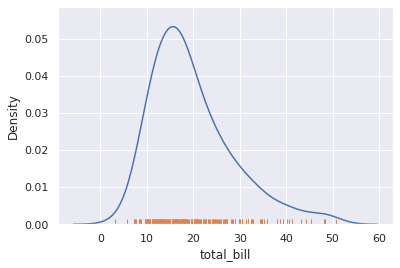

In [41]:
sns.kdeplot(tips['total_bill']);  # diagrama tipo kdeplot para la columna total factura
sns.rugplot(tips['total_bill']);  # diagrama tipo rugplot para la columna total factura

### **3.6. Método `ecdfplot`**
---

Otro diagrama común de distribución es el *ECDF plot*,  Del inglés *empirical cumulative distribution functions*. Los diagramas de distribución empírica acumulada representan la proporción de valor **por debajo** de una observación determinada, sin recurrir al *binning* como en los histogramas. 

Por ejemplo, al observar los valores acumulados del valor de la factura obtenemos:

<AxesSubplot:xlabel='total_bill', ylabel='Proportion'>

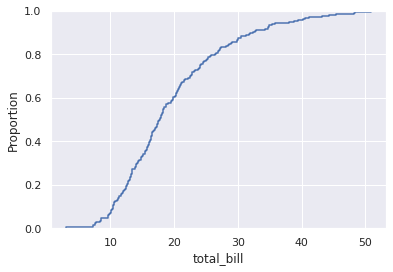

In [42]:
sns.ecdfplot(data = tips, x = 'total_bill')

También es posible generar nuevas codificaciones de color a partir del argumento **`hue`**. Además, se puede usar el conteo absoluto (**`'count'`**) en vez de la proporción (**`'proportion'`**) definiendo estas cadenas en el argumento **`stat`**.

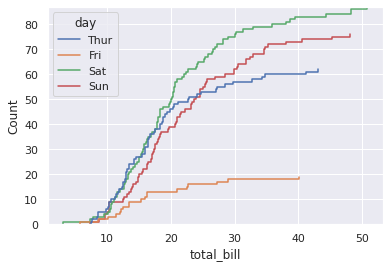

In [43]:
sns.ecdfplot(data = tips, x = 'total_bill', hue = 'day', stat = 'count');

### **3.7. Método `displot`**
---

Finalmente, *Seaborn* dispone de un método general para gráficos de distribución. Este es el método **`displot`** que permite generalizar los  gráficos de distribución de una variable (**`histplot`**, **`kdeplot`** y **`ecdfplot`**), además de habilitar la codificación por filas y columnas.

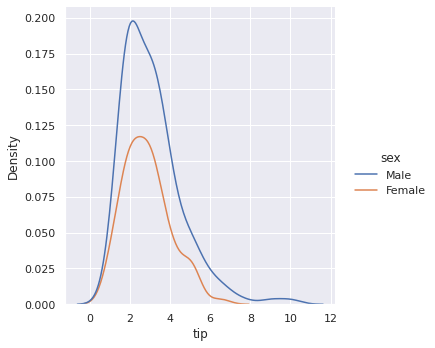

In [44]:
sns.displot(data=tips, x="tip", kind="kde", hue = 'sex');

En el caso de los histogramas y los diagramas *KDE* es posible generar diagramas de distribución bivariados al definir por aparte la columna en el eje **`x`** y en el eje **`y`**. 

Otro argumento valioso es el argumento **`col_wrap`** (y su equivalente para filas **`row_wrap`**), que permite definir un límite de columnas de gráficos por fila.

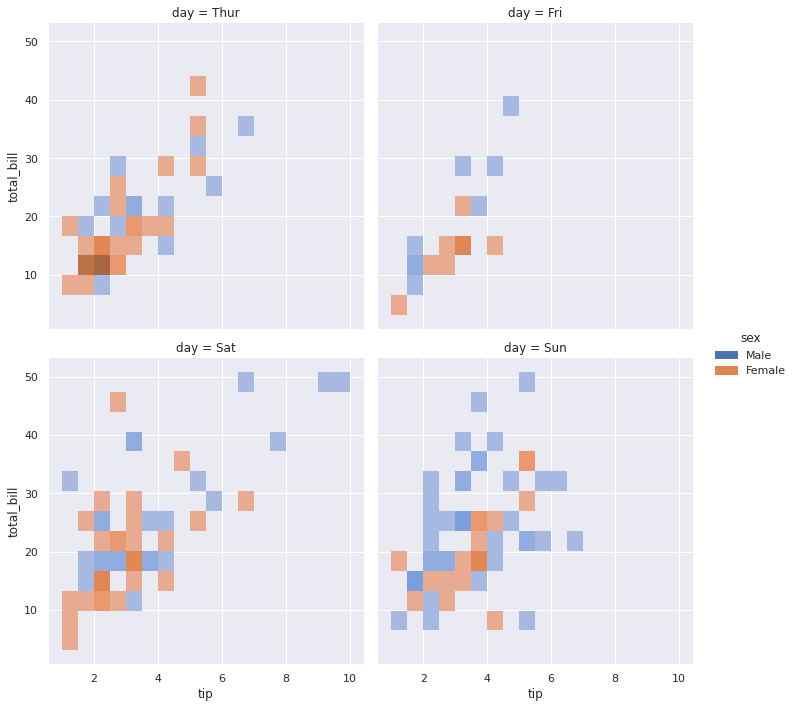

In [45]:
sns.displot(data=tips, x="tip", y = 'total_bill', 
            kind="hist",            
            col = 'day', 
            col_wrap = 2,
            hue = 'sex');

## **4. Visualizaciones de datos categóricos**
---

A continuación veremos las funciones especiales para la representar la distribución de datos categóricos, entendiendo esto como la distribución de los datos respecto a columnas no numéricas, pero con valores que clasifican los datos por categorías; por ejemplo por sexo, nacionalidad, profesión, así como su relación con respecto a otras columnas numéricas o también categóricas.

Detallaremos el uso de las siguientes funciones:

* **`barplot`**
* **`countplot`**
* **`boxplot`**
* **`violinplot`**
* **`stripplot`**
* **`swarmplot`**
* **`catplot`**


### **4.1. Métodos `barplot` y `countplot`**
---

Estas gráficas son muy similares. Permiten obtener datos agregados de una variable categórica y representar el resultado gráficamente.  

**`barplot`**: Es un gráfico que permite consolidar, por categoría, los valores de cierta columna numérica basándose en alguna función de agregación; por defecto, la media aritmética.

Por ejemplo, para el *DataFrame* **`tips`** podríamos estar interesados en conocer cuál es el promedio por sexo, del valor total de factura cancelado. Para ello usamos la función **`barplot`**, en donde se especifica la categoría por la cual se consolidará el resultado (**`x ='sex'`**), el dato o columna que queremos consolidar (**`y ='total_bill'`**), y finalmente, el *DataFrame* del cual se obtendrán los datos (**`data = tips`**):

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

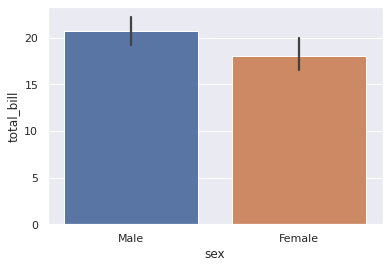

In [46]:
# Por defecto presenta barras con el intervalo de confianza al 95% para el cálculo de la medida de tendencia central
sns.barplot(x='sex',
            y='total_bill',
            hue = 'sex',
            legend = False,
            data=tips)

<AxesSubplot:xlabel='sex', ylabel='total_bill'>

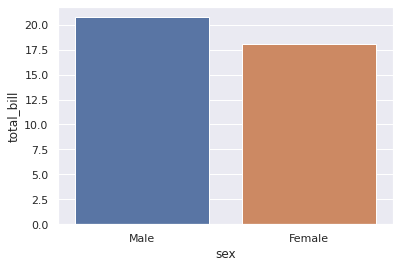

In [47]:
# Para no mostrar la barra del intervalo de confianza, se puede usar el argumento "ci = None"
sns.barplot(x='sex',
            y='total_bill',
            hue = 'sex',
            legend = False,
            data=tips, 
            errorbar=None)

Es posible cambiar la función de agregación, por una función propia u otra predefinida que convierta un vector a un escalar. Por ejemplo, la desviación estándar. Esto se realiza definiendo el parámetro **`estimator`** en el llamado a la función:

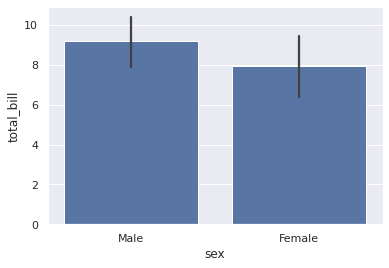

In [48]:
sns.barplot(x='sex',
            y='total_bill',
            data=tips,
            estimator=np.std);      

**`countplot`**: Es muy similar a **`barplot`**, excepto que en este caso el estimador está contando explícitamente el número de ocurrencias. Por esto, sólo pasamos como parámetro el valor de `x` que corresponde a la categoría que se diagramará. El resultado es una gráfica con el consolidado de ocurrencias por cada categoría, que en el caso del ejemplo corresponde a cada día **`'day'`**.

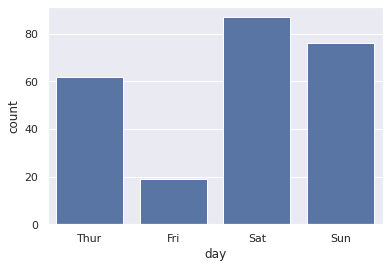

In [49]:
sns.countplot(x='day', data=tips);

### **4.2. Métodos `boxplot` y `violinplot`**
---

Los diagramas de caja **`boxplot`** y los diagramas de violín **`violinplot`** se utilizan para conocer la distribución de datos numéricos. Si se requiere, es posible diferenciar las distribuciones por categorías.

**`boxplot`**: Un diagrama de caja muestra la distribución de datos cuantitativos de una manera que facilita las comparaciones entre variables o entre niveles de una variable para distintas categorías. El recuadro muestra los cuartiles del conjunto de datos, mientras que los bigotes se extienden para mostrar el resto de la distribución, excepto los puntos que se determinan como valores atípicos (*outliers*), utilizando un método que es una función del rango intercuartílico.

En el siguiente ejemplo se muestra la distribución correspondiente para la columna **`total_bill`**, clasificándola por día de la semana **`'day'`**, donde cada caja representa la distribución correspondiente en cada día.


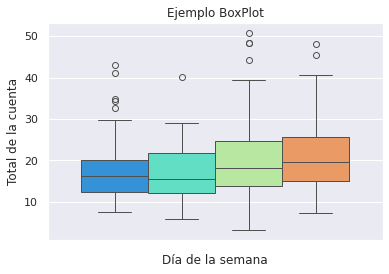

In [50]:
# Se pone el nombre ax para afinar la figura con instrucciones de matplotlib posteriormente
ax = sns.boxplot(hue="day", 
                 y="total_bill", 
                 data=tips, 
                 palette='rainbow',
                 legend = False)

ax.set_title("Ejemplo BoxPlot")
ax.set_xlabel("Día de la semana")
ax.set_ylabel("Total de la cuenta");


Incluso, es posible segmentar más las distribuciones dentro de una categoría. Esto permite mostrar subcategorías originadas de agrupar los datos de acuerdo a los valores contenidos en otra columna categórica adicional.

Por ejemplo, podríamos querer visualizar la distribución de los valores de la columna **`total_bill`** para cada día, pero mostrando separadamente la distribución que corresponde a grupos según el género **`'sex'`**. Para ello, se hace uso del parámetro **`hue`** con el que se especifica la subcategoría: 

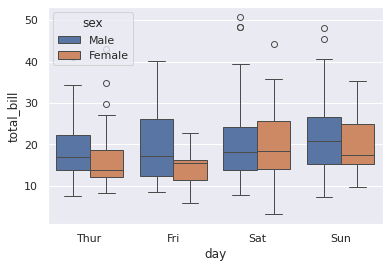

In [51]:
sns.boxplot(x='day', y='total_bill', data=tips, hue='sex');

Si en el llamado a la función no se especifican los parámetros **`x`** y **`y`**, se mostrará la distribución general (sin usar categorías), de cada una de las columnas con valores cuantitativos contenidas en el *DataFrame* ingresado como parámetro:

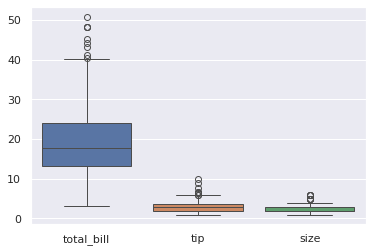

In [52]:
sns.boxplot(data=tips);

Note que el resultado no es muy adecuado porque las 3 variables tienen valores en escalas distintas. En este caso, sería preferible generar diagramas de cajas independientes por cada variable.

Al igual que antes, también es posible personalizar la gráfica con el uso de algunos otros parámetros como **`palette`**, o **`orient`**. En el siguiente ejemplo usamos el parámetro **`orient`** para cambiar la orientación de las gráficas a un modo horizontal:

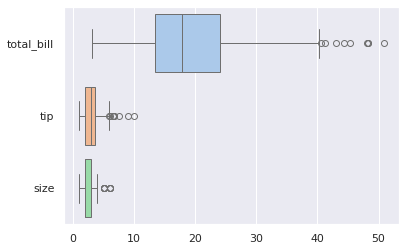

In [53]:
sns.boxplot(data=tips, orient='h', palette='pastel');

**`violinplot`**: Un gráfico de violín juega un papel similar al diagrama de cajas. Muestra la distribución de datos cuantitativos a través de varios niveles de una (o más) variables categóricas. Así, permite que esas distribuciones se puedan comparar entre sí. A diferencia de un diagrama de caja, en el que todos los componentes de la gráfica corresponden a puntos de datos reales, la gráfica del violín presenta una **estimación de la densidad de kernel** de la distribución de probabilidad subyacente **(kde)**.

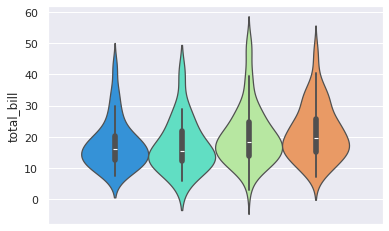

In [54]:
sns.violinplot(hue="day", y="total_bill", data=tips, palette='rainbow', legend=False);

**`violinplot`** permite además el uso del parámetro **`hue`** para diagramar una subcategorización de acuerdo a valores de otra columna categórica:

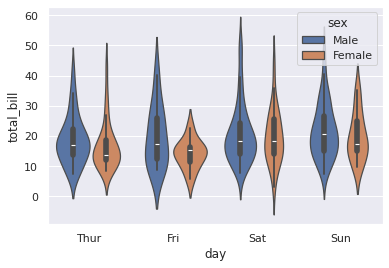

In [55]:
sns.violinplot(x="day", y="total_bill", data=tips, hue='sex');

Además, para evitar presentar información repetida, **`violinplot`** permite mostrar la distribución de cada subcategoría dividiendo cada distribución en dos partes, donde cada subcategoría se presenta en una mitad de la distribución. Para ello se usa el parámetro **`split`**, asignándole el valor **`True`**.

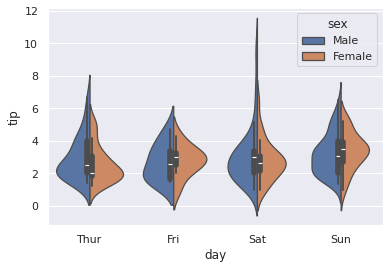

In [56]:
sns.violinplot(x="day", 
               y="tip", 
               data=tips,
               hue='sex', 
               split=True);

### **4.3. Métodos `stripplot` y `swarmplot`**
---
Las funciones **`stripplot`** y **`swarmplot`** permiten generar una visualización de la distribución de una variable, en un estilo similar al de los diagramas de dispersión, permitiendo codificar la separación entre categorías.



**`stripplot`**: El **`stripplot`** dibuja un diagrama de dispersión correspondiente a una variable numérica, clasificándola de acuerdo a una variable categórica.

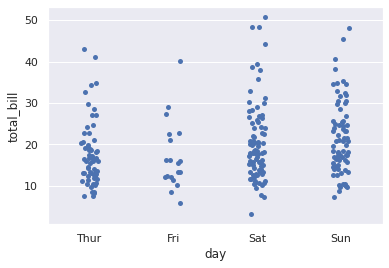

In [57]:
sns.stripplot(x="day", y="total_bill", data=tips);

Si quisiéramos ver la distribución en una sola línea de puntos, es posible usar el parámetro **`jitter`** con el valor **`False`**:

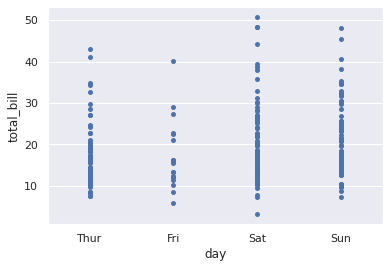

In [58]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=False);

También, es posible usar el parámetro **`hue`** para realizar una subclasificación de acuerdo a valores de otra columna categórica:

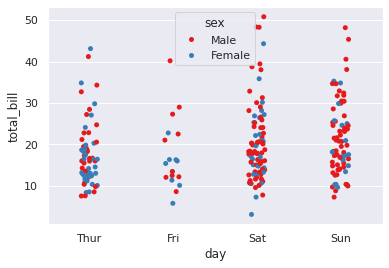

In [59]:
sns.stripplot(x="day", y="total_bill", data=tips, hue='sex', palette='Set1');

El argumento **`dodge`**, usado para separar las categorías, también funciona con esta función y permite una visualización más clara:

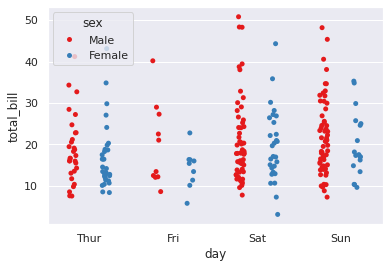

In [60]:
sns.stripplot(x="day", y="total_bill", data=tips, hue='sex', palette='Set1', dodge=True);

**`swarmplot`**: **`swarmplot`** es similar a **`stripplot`**, pero los puntos se ajustan (sólo a lo largo del eje categórico) para que no se superpongan entre sí. Esto proporciona una mejor representación de la distribución de los valores. Sin embargo, esta representación no escala bien para un gran número de observaciones (tanto en términos de la capacidad de mostrar todos los puntos, como en términos del cálculo necesario para organizarlos). Por lo tanto, no es recomendable su uso cuando se tiene una gran cantidad de datos.

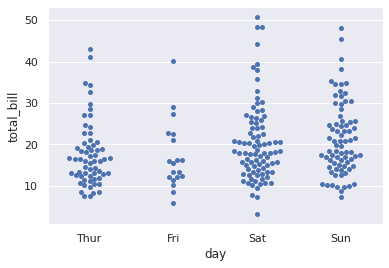

In [61]:
sns.swarmplot(x="day", y="total_bill", data=tips);

Finalmente, **`swarmplot`** también admite los parámetros **`hue`** y **`dodge`** para subclasificar de acuerdo a otras variables:

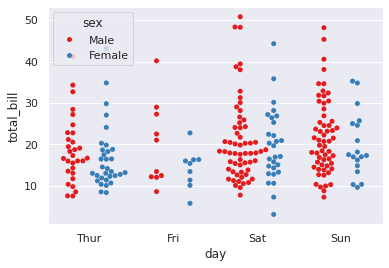

In [62]:
sns.swarmplot(x ="day", 
              y ="total_bill",
              hue = 'sex',
              data = tips, 
              palette ="Set1", 
              dodge = True);

En algunos casos se puede generar un *warning* o alerta cuando se tienen demasiados puntos para representar. En este caso es posible disminuir el tamaño de cada punto para permitir mostrar más. Esto se logra con el argumento **`size`**, que representa el radio de cada punto, con 5 unidades por defecto.

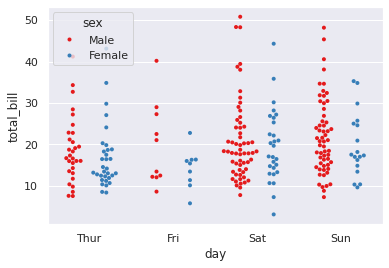

In [63]:
# Esta visualización no tiene alertas y representa todos los puntos del dataset.
sns.swarmplot(x ="day", 
              y ="total_bill",
              hue = 'sex',
              data = tips, 
              palette ="Set1",
              size = 4, # Disminuimos el tamaño de los puntos 
              dodge = True);

Es posible sobreponer dos tipos de diagramas diferentes sobre una misma gráfica para tener mayor información y mejorar la interpretación de los datos. Esto se logra llamando seguidamente dos funciones de visualización con la misma definición de datos a presentar, como se ilustra en el siguiente ejemplo en donde se sobreponen un **`swarmplot`** y un **`violinplot`**:

<AxesSubplot:xlabel='tip', ylabel='day'>

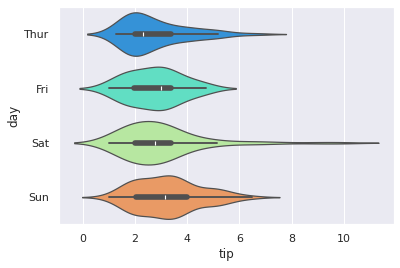

In [64]:
sns.violinplot(x="tip", y="day", hue='day', legend=False, data=tips,palette='rainbow')

<AxesSubplot:xlabel='tip', ylabel='day'>

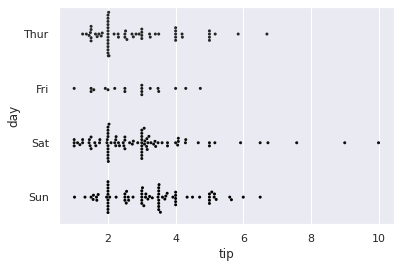

In [65]:
sns.swarmplot(x="tip", y="day", hue='day', legend=False, data=tips, palette='dark:black', size=3)

### **4.4. Método `catplot`**
---

El método **`catplot`** (anteriormente conocido como *factorplot*) es un método genérico con el que se puede graficar cualquiera de los estilos previamente vistos para variables categóricas. Los parámetros usados son básicamente los mismos, y adicionalmente se define el parámetro **`kind`** para especificar el estilo de diagrama que se desea, este puede tomar los valores: **`'bar'`**, **`'swarm'`**, **`'violin'`**, etc.

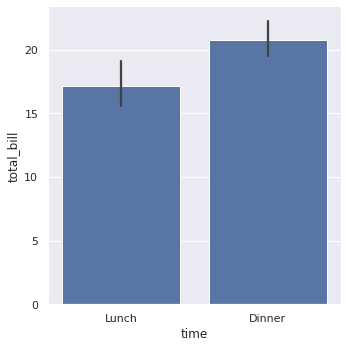

In [66]:
sns.catplot(x='time',y='total_bill', data=tips,
            kind='bar')

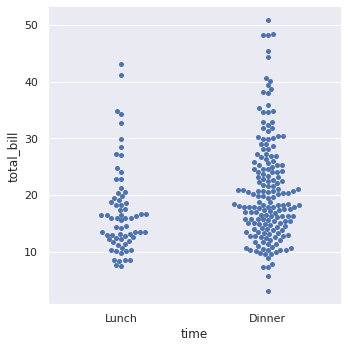

In [67]:
sns.catplot(x='time',y='total_bill',data=tips,kind='swarm')

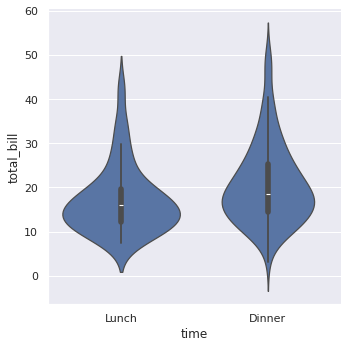

In [68]:
sns.catplot(x='time',y='total_bill',data=tips,kind='violin')

Además de proveer la funcionalidad genérica para cada tipo de visualización categórica, es posible utilizar argumentos para organizar en cuadriculas subgráficas, tal como se realizó previamente con los métodos **`relplot`** y **`displot`**.

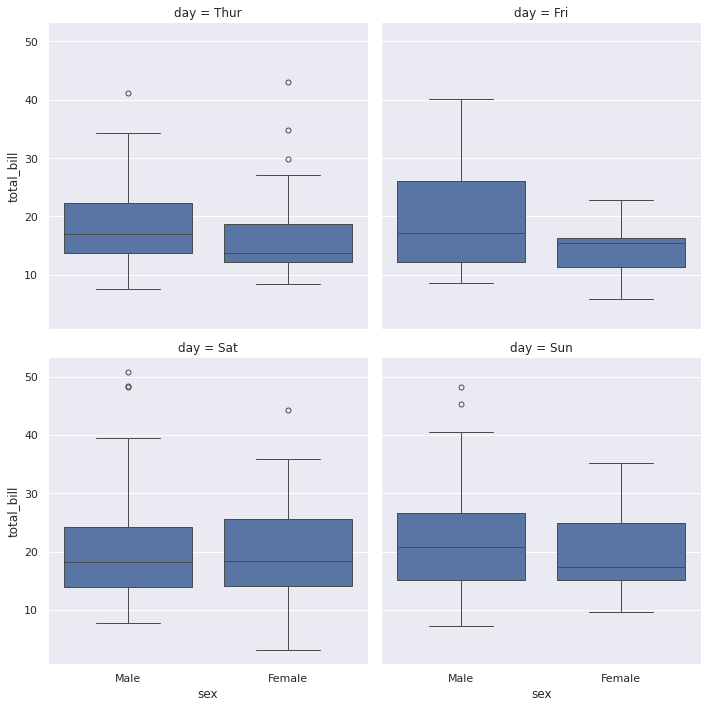

In [69]:
sns.catplot(x='sex', y='total_bill',data=tips, kind='box', 
            col = 'day', col_wrap = 2);

## **5. Gráficos matriciales**
---

Los diagramas de matriz le permiten graficar los datos como matrices codificadas por colores y también se pueden usar para indicar grupos (*clusters*) dentro de los datos.

Comencemos explorando el **`heatmap`** y el **`clustermap`** de *Seaborn*.

#### **5.1. Método `heatmap`**
---

Para que un mapa de calor funcione correctamente, sus datos ya deberían estar en forma de matriz. La función de **`heatmap`**  colorea los mapas de calor por usted. Por ejemplo:


In [70]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Recordemos que la función **`corr`** de *pandas* retorna una matriz con los valores de correlación entre pares de columnas numéricas. De esta manera, los indices horizontales y verticales del *DataFrame* retornado son los nombres de las columnas con valores numéricos de la matriz original, los valores de la matriz retornada son los coeficientes de correlación entre los correspondientes pares de índices que se interceptan:

In [71]:
tips.corr()  #Retorna la matriz de correlaciones para pares de columnas con valor numérico. 

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


Ahora, usamos la función **`heatmap`** para generar el mapa de calor de la matriz de correlación retornada por **`corr`**.

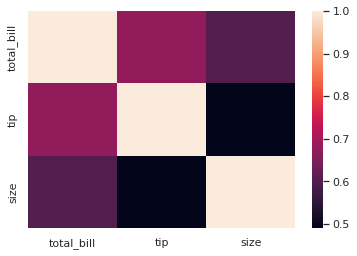

In [72]:
sns.heatmap(tips.corr());

Para este caso, el diagrama permite identificar mediante tonos de colores los coeficientes de correlación. Como es de suponer, la diagonal representa la intersección de una columna consigo misma por lo que su valor de correlación es igual a $1.0$.

Es posible incluir en la matriz el valor correspondiente a los coeficientes de correlación ajustando el parámetro **`annot`** en **`True`**:

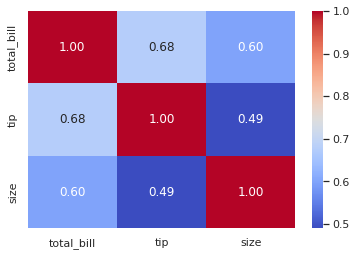

In [73]:
sns.heatmap(tips.corr(), 
            annot=True,       # Se muestran los textos correspondientes.
            fmt=r'.2f',       # Formato de la cadena de texto asociada. (2 dígitos decimales)
            cmap='coolwarm'); # Colormap usado en la visualización.

Se pueden usar distintas opciones para personalizar el estilo de la gráfica. Por ejemplo, es posible poner líneas de separación definiendo su color y grosor:

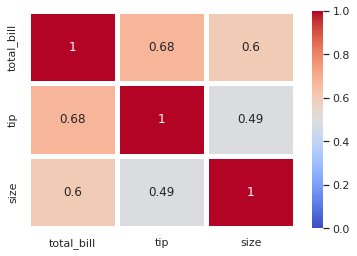

In [74]:
sns.heatmap(tips.corr(), annot=True, 
            linewidths=5, linecolor='white',  # Grosor y color de la separación.
            cmap='coolwarm', vmin=0);  # vmin representa el valor mínimo del colormap, para tener el rango completo entre 0 y 1.

Para los ejemplos siguientes usaremos un dataset *incluido* con *Seaborn* que corresponde a información de vuelos. Se registra el año, el mes y la cantidad de pasajeros en vuelos en Estados Unidos a mediados del siglo pasado.

In [75]:
flights = sns.load_dataset('flights')
flights.head(10)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


In [76]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
dtypes: category(1), int64(2)
memory usage: 2.9 KB


Para ver un *heatmap* con estos datos de vuelos necesitamos construir la matriz primero. Para esto, se puede usar la función **`pivot_table`**, así definimos los valores que se quieren relacionar. En este ejemplo se define que en las columnas se referirán los años y en los índices horizontales los meses; los valores de la matriz serán la cantidad de pasajeros para cada par **`mes-año`** respectivamente: 

In [77]:
pvflights = flights.pivot_table(values='passengers',
                                index='month',
                                columns='year',
                                aggfunc='sum')
pvflights

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419
Apr,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472
Jun,135,149,178,218,243,264,315,374,422,435,472,535
Jul,148,170,199,230,264,302,364,413,465,491,548,622
Aug,148,170,199,242,272,293,347,405,467,505,559,606
Sep,136,158,184,209,237,259,312,355,404,404,463,508


Ahora se usa un diagrama de calor de la matriz resultado. Se puede concluir que Julio y Agosto son los meses con un mayor número de pasajeros a lo largo de los años. Recordemos que estos meses son de verano en Norteamérica. Igualmente, se  muestra un aumento progresivo de pasajeros cada año, mostrando que el de mayor cantidad de pasajeros es el año 1960. Este tipo de conclusiones se pueden hallar con sólo ver la gráfica e interpretar las tonalidades del diagrama, lo que facilita el análisis de la información.

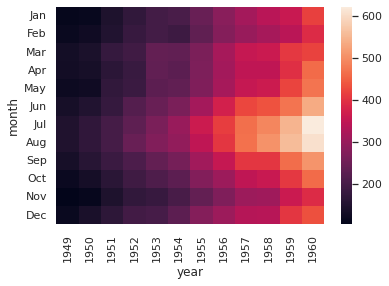

In [78]:
sns.heatmap(pvflights);

Si se requiere, es posible personalizar la gráfica con líneas divisorias y usando diferentes tonalidades de colores con el parámetro **`cmap`** como se ve a continuación:

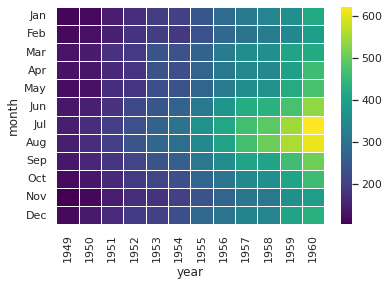

In [79]:
sns.heatmap(pvflights,
            cmap='viridis',
            linecolor='white',
            linewidths=1);

### **5.2. Método `clustermap`**
---

El **`clustermap`** usa agrupamiento jerárquico (usando [dendogramas](https://es.wikipedia.org/wiki/Dendrograma)) para generar una versión del mapa de calor donde se pueda distinguir entre grupos. Por ejemplo:

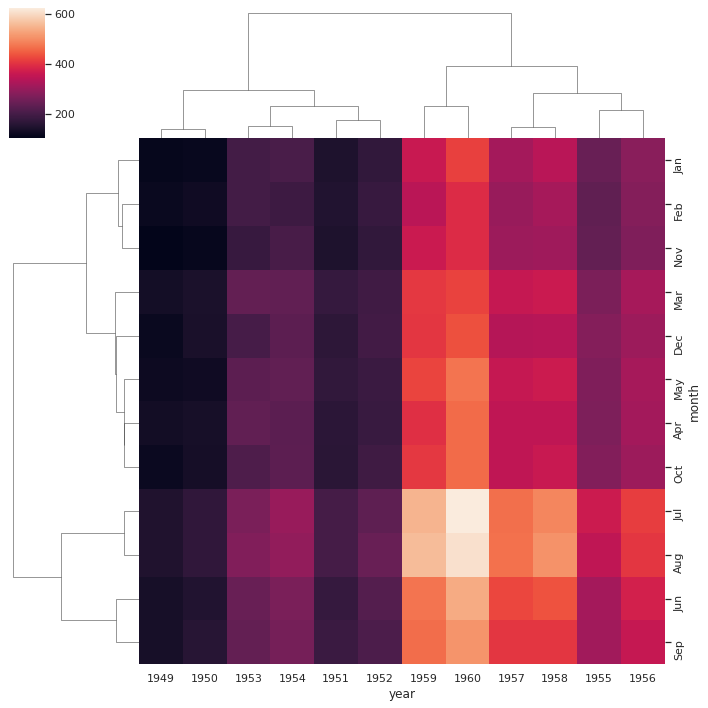

In [80]:
sns.clustermap(pvflights);

Observe cómo los años y meses ya no están en orden, en su lugar se agrupan por similitud en el valor (recuento de pasajeros). Eso significa que podemos comenzar a inferir cosas de esta trama, como por ejemplo que agosto y julio siendo similares, se encuentran agrupados (tiene sentido, ya que ambos son meses de viaje de verano). También, observe que en un segundo nivel de agrupamiento, los meses de julio y agosto, se agrupan nuevamente con los meses de junio y septiembre, que es cuando inicia y termina el verano. 

Un comportamiento similar se puede observar para los meses de primavera/otoño e invierno. En el caso del invierno, los meses de enero, febrero y noviembre se agrupan claramente. Sin embargo, no aparece el mes de diciembre en esta agrupación. En este caso, si bien es un mes de invierno, tiene una tendencia diferente, quizás por tratarse del mes cuando se celebra la navidad. 

Por otra parte, si queremos hacer el análisis aún más detallado del comportamiento de las tendencias por meses, debemos tener en cuenta que no sería recomendable comparar los datos directamente. Cada año ha ido aumentando el total de viajeros y por este motivo no estamos haciendo una comparación justa. En este caso, se pueden añadir más opciones para entender y preparar mejor los datos, por ejemplo, mediante la normalización de los datos por año, usando el parámetro **`'standard_scale'`** y asignándole el valor $1$:

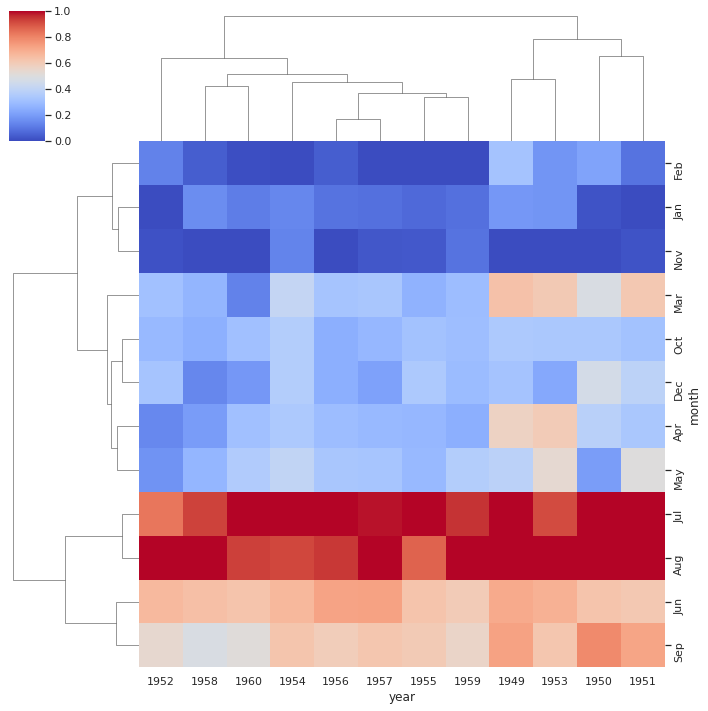

In [81]:
vuelos = sns.clustermap(pvflights, cmap='coolwarm', standard_scale=1);

Este resultado permite apreciar los análisis hechos anteriormente con mayor claridad.

Por último, el resultado de la visualización se puede asignar a una variable, como en el caso anterior en donde se asignó a la variable **`vuelos`**, y podemos exportar a un archivo el diagrama mediante la función **`savefig`**:

In [82]:
# Descargue o encuentre el archivo generado para ver el resultado.

vuelos.savefig("images/vuelos.pdf");

## **6. Cuadrículas**
---

Las cuadrículas o *grids* son tipos generales de gráficos que permiten mapear diagramas en filas y columnas de una cuadrícula. Esto significa que se dibujarán distintas gráficas para cada par de variables correspondientes dentro de la cuadrícula. Al igual que la función **`pairplot`**, discutida anteriormente, con la que se grafican los datos para cada par de columnas de valores numéricos.

Para los ejemplos siguientes obtendremos un *DataFrame* de los datos incorporados en el módulo *Seaborn*. En este caso, retomaremos el *dataset* ***iris***, que contiene diferentes medidas correspondientes a una muestra de 3 especies de flores:


In [83]:
iris = sns.load_dataset('iris')

In [84]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Podemos visualizar rápidamente el *dataset* mediante la función **`pairplot`** que vimos al principio de este material, y en la tarea de la Unidad 3:

> **Nota**: Las visualizaciones realizadas por medio de cuadrículas son más costosas computacionalmente. La ejecución de las funciones de esta sección puede tardar bastante más que las vistas hasta el momento.

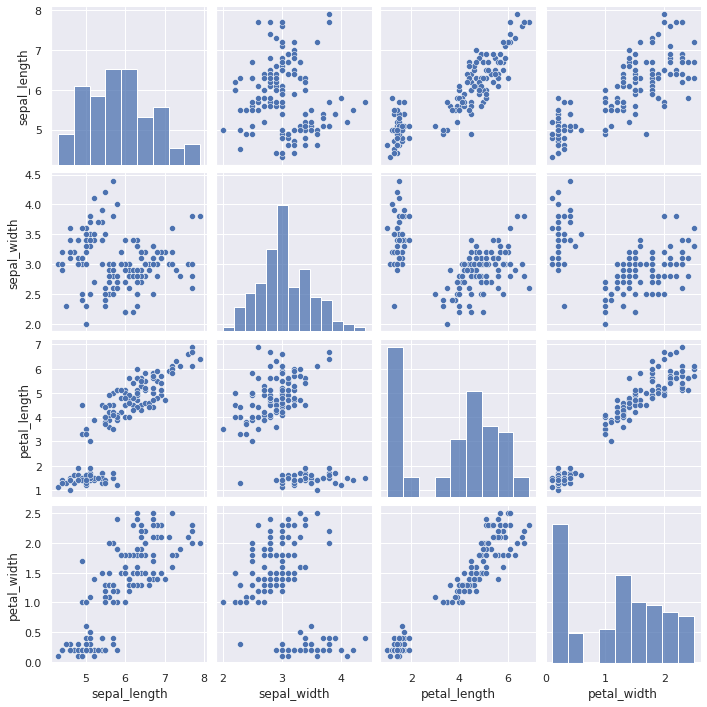

In [85]:
sns.pairplot(data=iris);

También podemos distinguir una variable categórica por medio del tono con el argumento **`hue`**. Realicemos esto con la especie de la flor observada (**`species`**).

In [86]:
# Especies distintas del dataset
iris['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

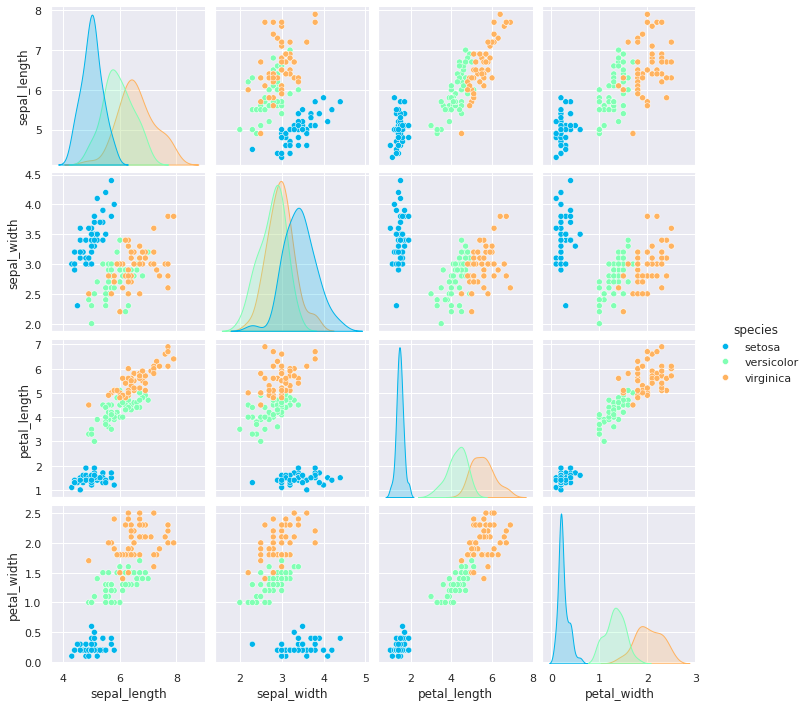

In [87]:
sns.pairplot(iris,
             hue='species',
             palette='rainbow');

Los mecanismos que veremos en este *Notebook* permiten personalizar visualizaciones compuestas de este tipo. Estos métodos son: **`PairGrid`** y **`FacetGrid`**.

### **6.2. Método `PairGrid`**
---

**`PairGrid`** genera una cuadrícula de *subplots* para presentar gráficos por cada pareja de variables del *dataset*. Inicialmente, las gráficas generadas no contienen ningún tipo de diagrama, y simplemente están en blanco, disponibles para dibujar sobre ellas el tipo de diagrama que se desee. Esto permite un amplio control y personalización sobre estas gráficas.

Usamos **`PairGrid`** enviándole como argumento el *dataset* que se desea diagramar. Esto genera la siguiente cuadrícula, en donde para cada eje se encuentran representadas las columnas numéricas del *DataFrame*, y las gráficas en blanco por cada pareja.

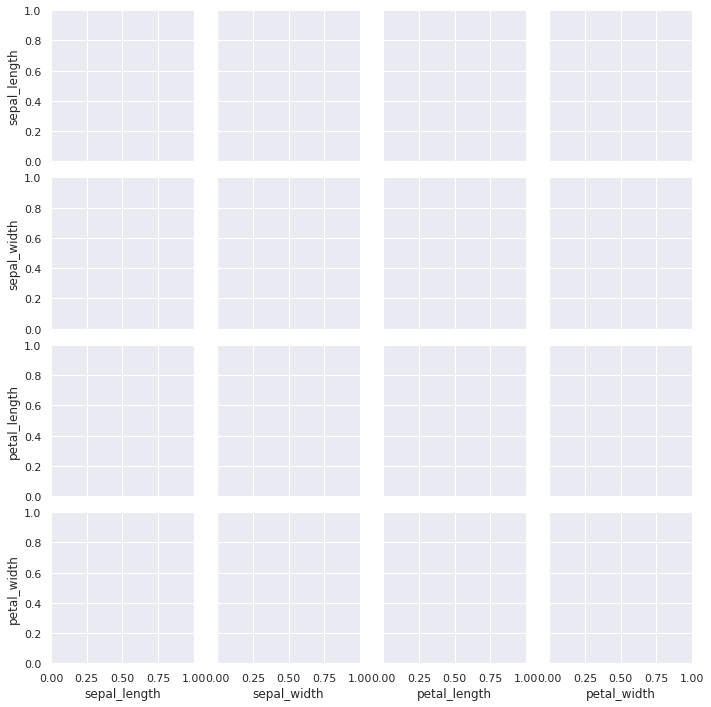

In [88]:
# Solo la cuadrícula
sns.PairGrid(iris);

Para manipular la cuadrícula,  la asignamos a una variable **`g`** mediante la cual se podrán manipular las gráficas de la cuadrícula. Ahora, podremos usar **`g`** como la referencia a la cuadrícula para mapear las gráficas. En el siguiente ejemplo, se mapean las gráficas con diagramas de tipo **`scatter`**.

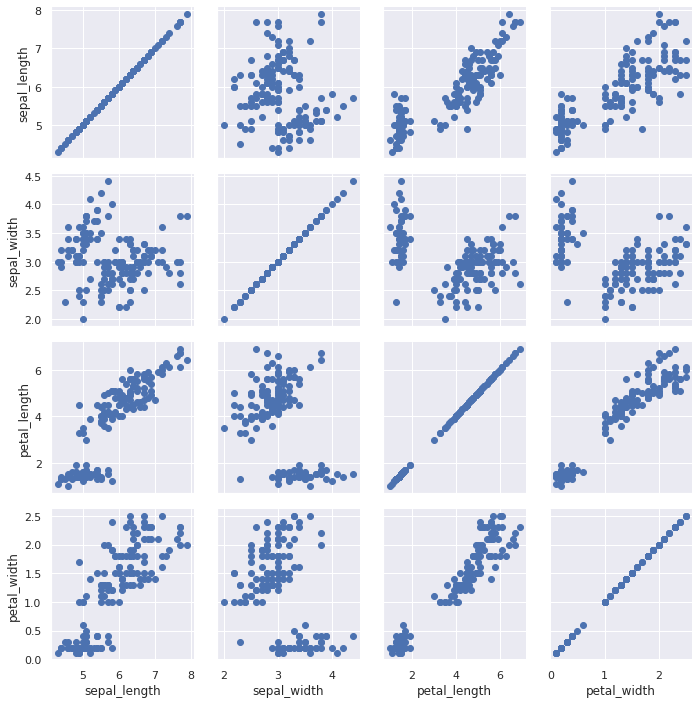

In [89]:
# Se mapea el tipo de gráfico que queremos en las figuras.
g = sns.PairGrid(iris);
g.map(plt.scatter);

Mediante la referencia a la cuadrícula, podemos establecer distintos tipos de diagrama para cada gráfica. Por ejemplo, en el siguiente caso se mapea un diagrama de tipo **`hist`** para la diagonal principal, uno de tipo **`scatter`** para las gráficas superiores a esta diagonal, y uno de tipo **`kde`** para las gráficas inferiores. Para elegir la sección de la cuadricula a mapear se usan las siguientes funciones:

* **`map_diag`**: Diagonal de la matriz.
* **`map_upper`**: Sección superior a la diagonal.
* **`map_lower`**: Sección inferior a la diagonal.


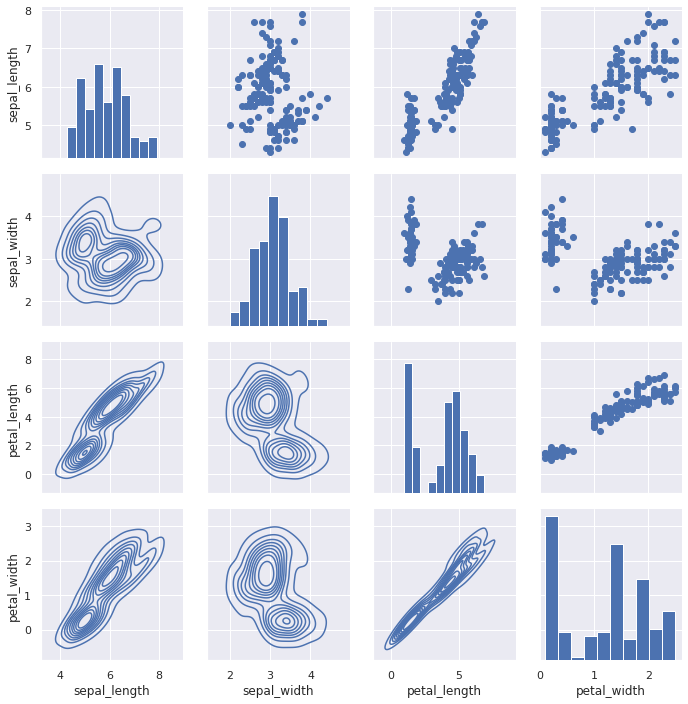

In [90]:
g = sns.PairGrid(iris)
g.map_diag(plt.hist);
g.map_upper(plt.scatter);
g.map_lower(sns.kdeplot);

**`PairGrid`** puede recibir otros parámetros adicionales, que permiten personalizar las gráficas u obtener más información. Por ejemplo, podemos subclasificar los datos con el parámetro **`hue`** y también personalizar los marcadores para cada subclase con **`hue_kws`**. Otras opciones permiten por ejemplo usar distintos tipos de colores para los diagramas:

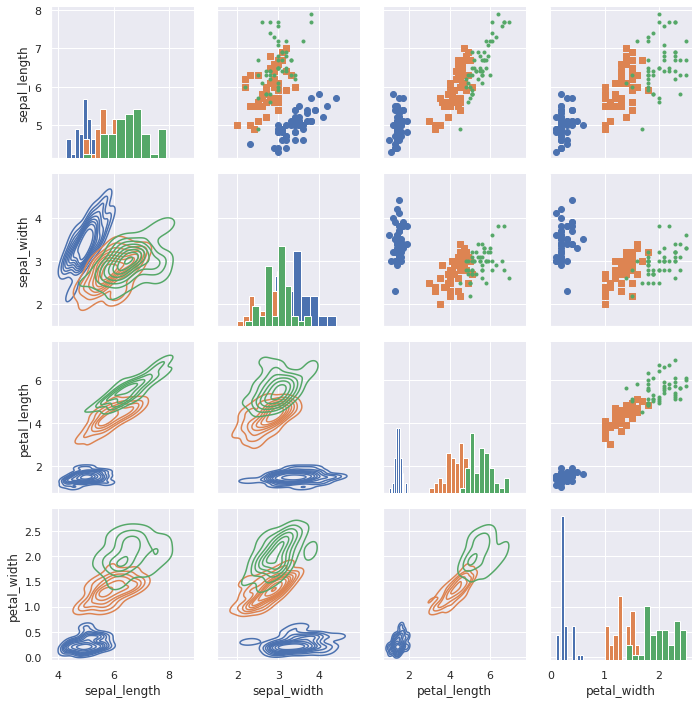

In [91]:
# Se clasifican los diagramas de acuerdo a la especie y se personalizan los marcadores.

g = sns.PairGrid(iris, hue='species',
                 hue_kws={"marker": ["o", "s", "."]})
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot);

### **6.3. Método `FacetGrid`**
---

**`FacetGrid`** permite generar gráficos con base en la agrupación de estos por una o dos características en común, entendiéndose característica como la información en una columna categórica. Una vez definidas las agrupaciones se graficará el tipo de diagrama que se desea sobre la variable numérica que se quiera analizar.

Usaremos nuevamente el *DataFrame* **`tips`**.

In [92]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


El llamado a **`FacetGrid`** se hace definiendo el *DataFrame* a usar y el par de variables o columnas por los cuales se agruparán los datos. Esto generará las gráficas en blanco sobre las cuales se diagramará. Para el caso del siguiente ejemplo se realizarán las agrupaciones con base en las variables **`smoker`** y **`time`**.

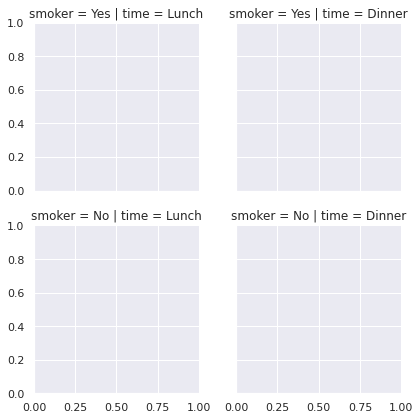

In [93]:
# Solo la cuadrícula
g = sns.FacetGrid(tips, col="time", row="smoker")

Ahora se mapea sobre las gráficas el estilo de diagrama para la variable cuantitativa a analizar. En este ejemplo se realiza un diagrama de tipo **`hist`** para la variable **`total_bill`**.

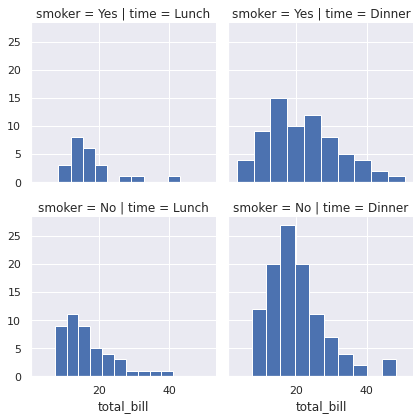

In [94]:
g = sns.FacetGrid(tips, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

Como se ve en las gráficas, las agrupaciones se han realizado para fumadores y no fumadores para cada tiempo, respectivamente. Podría haberse realizado la agrupación por una sola variable, por ejemplo **`'smoker'`** y tendríamos el siguiente resultado:

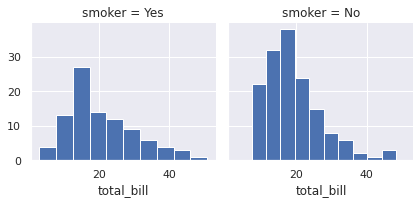

In [95]:
g = sns.FacetGrid(tips, col="smoker")
g = g.map(plt.hist, "total_bill")

Con **`FacetGrid`** es posible también definir una subclasificación con base en otra variable mediante el parámetro **`hue`**. Por ejemplo, vemos el uso de **`hue`** con el valor **`'sex'`**, de manera que en cada agrupación se hará una diferenciación por sexo. 

También, usamos el siguiente ejemplo para mostrar que los estilos de diagramas del tipo **`scatter`** requieren de dos variables numéricas para la diagramación. En este caso se usan **`'total_bill'`** y **`'tip'`**. Si se hace el llamado con sólo una se generaría un error por deficiencia de argumentos. 

Además, se ilustra cómo agregar una leyenda al diagrama con ayuda del método **`add_legend`**:

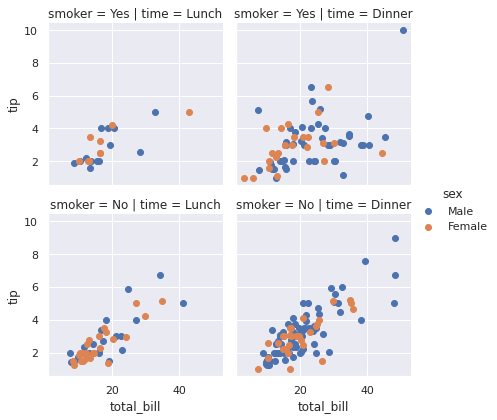

In [96]:
g = sns.FacetGrid(tips, col="time",  row="smoker",hue='sex')
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

### **6.4. Método `JointGrid`**
---

**`JointGrid`** es la versión general de las cuadrículas de tipo **`jointplot`** que se describió previamente.


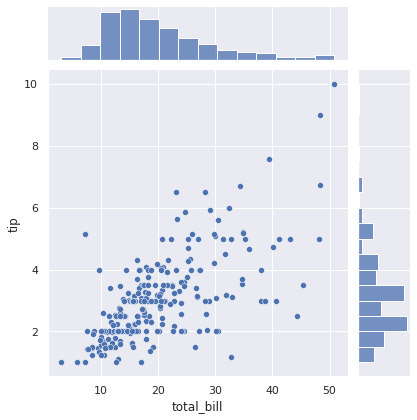

In [97]:
sns.jointplot(x='total_bill',y='tip',data=tips);

Primero se hace el llamado a la función definiendo el *DataFrame* a usar y el par de variables a representar en cada eje. Con esto obtenemos una gráfica en blanco referenciada por **`g`**, que usaremos para definir el tipo y características del diagrama a elaborar.


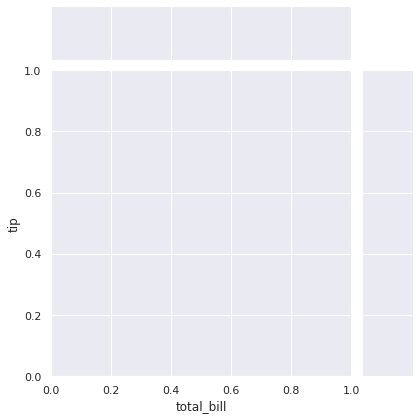

In [98]:
# Crea la cuadrícula
g = sns.JointGrid(x="total_bill", y="tip", data=tips)

Usando **`g`** como referencia a la figura, definimos el tipo de diagrama y obtenemos el siguiente resultado:

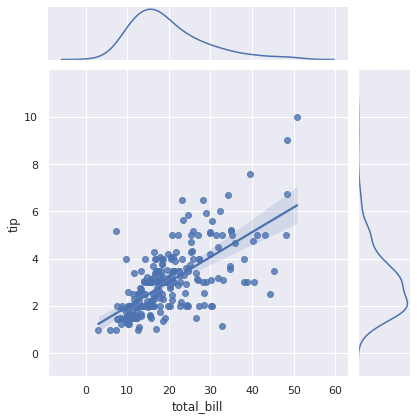

In [99]:
g = sns.JointGrid(x="total_bill", y="tip", data=tips)
g = g.plot(sns.regplot, sns.kdeplot)

## **7. Estilo y color**
---

*Seaborn* es bastante amplio en opciones para personalizar la visualización de las gráficas. Veremos algunas de las principales haciendo uso del *DataFrame* de propinas **`tips`**. 

### **7.1. Estilos**
---

Se puede usar estilos predefinidos mediante la función **`set_style`**. Todas las gráficas generadas después de realizar este cambio van a construirse con este estilo.

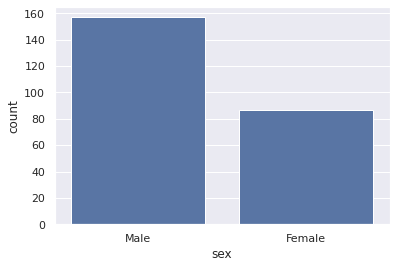

In [100]:
#Estilo predeterminado.
sns.countplot(x='sex',data=tips);

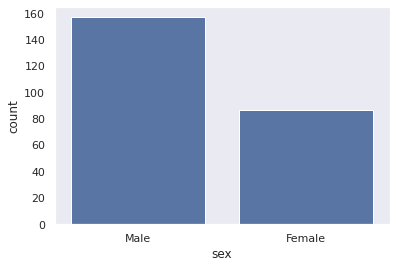

In [101]:
# Se puede escoger cualquiera de estos estilos: {darkgrid, whitegrid, dark, white, ticks}
sns.set_style('dark')

sns.countplot(x='sex',
              data=tips);

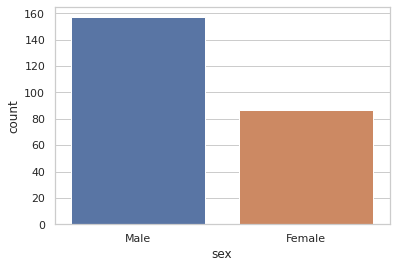

In [108]:
sns.set_style('whitegrid')

sns.countplot(
            x='sex',
            data=tips,
            palette='deep',
            hue = 'sex',
            legend=False
            );

In [109]:
sns.set_style('darkgrid')

### **7.2. `despine`**
---
Con la función **`despine`** es posible prescindir de los ejes que no se quieran visualizar.

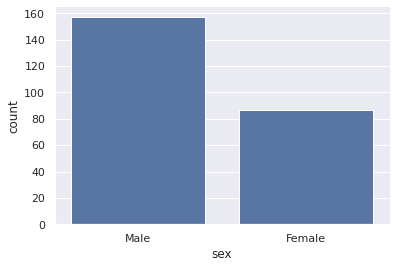

In [110]:
sns.countplot(x = 'sex',
              data = tips)
sns.despine()

Es posible definir explícitamente cuáles ejes se desean visualizar y cuáles no mediante la definición de los siguientes parámetros al invocar la función **`despine`**: 

```
top=True, right=True, left=False, bottom=False
```

Los valores mostrados corresponden a los valores por defecto. Los valores en **`True`** son ocultados.

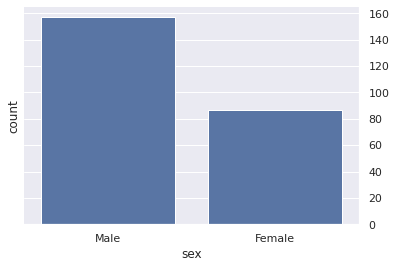

In [111]:
#Se oculta el eje izquierdo y mostramos el eje derecho.

sns.countplot(x ='sex',
              data = tips)
sns.despine(left = True, right = False) 

### **7.3. Tamaño y relación de aspecto**
---
Se puede usar el método de *Matplotlib* **`plt.figure(figsize=(width,height))`** para cambiar el tamaño de las figuras de *Seaborn*, que se construyen a partir de la funcionalidad de *Matplotlib*.

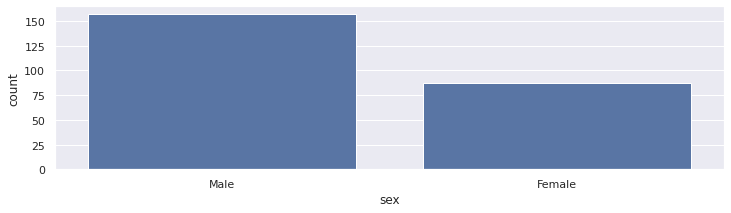

In [112]:
#La visualización en Seaborn depende del estado de Pyplot, parte de Matplotlib.
plt.figure(figsize=(12,3))
sns.countplot(x='sex',
              data=tips);

También se puede controlar el tamaño y la relación de aspecto de los gráficos de cuadrícula de Seaborn pasando los parámetros **`height`** y **`aspect`**. Por ejemplo:

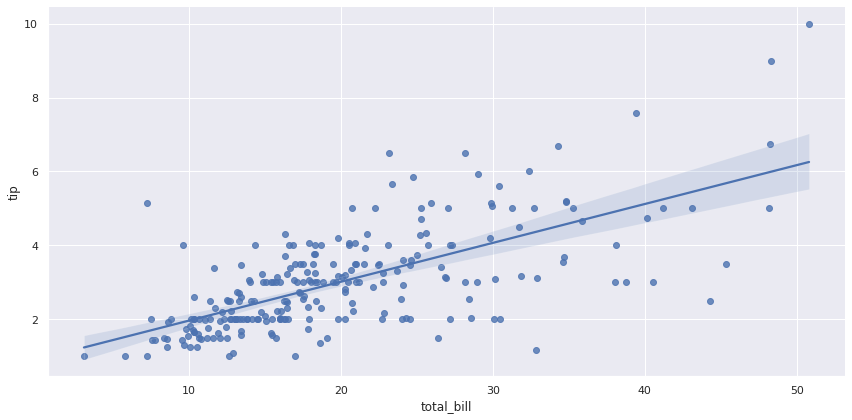

In [113]:
# Gráfico de tipo Grid
sns.lmplot(x ='total_bill',
           y ='tip',
           height = 6,
           aspect = 2,
           data = tips);

### **7.4. Contexto**
---

El método **`set_context`** permite sobreescribir los parámetros por defecto. Los contextos posibles son:

* *notebook*. (por defecto)
* *paper*.
* *talk*.
* *poster*.

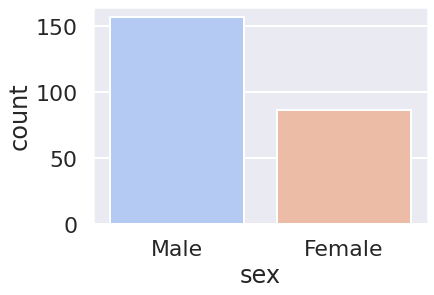

In [114]:
sns.set_context('poster') 
sns.countplot(x='sex', hue='sex', legend=False, data=tips, palette='coolwarm');

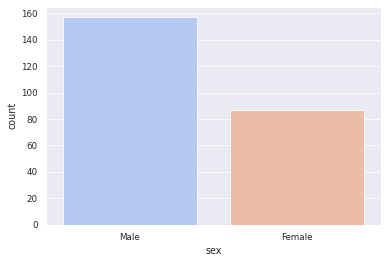

In [115]:
sns.set_context('paper') 
sns.countplot(hue='sex', x='sex', legend=False, data=tips, palette='coolwarm');

En los siguientes enlaces encontrará documentación detallada de las opciones disponibles para la personalización de la visualización de las gráficas:

* [*Seaborn* - Controlando la estética de las figuras](http://seaborn.pydata.org/tutorial/aesthetics.html) 
* [*Matplotlib* - *Colormaps* cuando se especifica una paleta de colores](https://matplotlib.org/stable/gallery/color/colormap_reference.html?highlight=colormaps%20reference)

## **Recursos adicionales**
---
Los siguientes enlaces corresponden a sitios en donde encontrará información muy útil para profundizar en el conocimiento de las funcionalidades de la librería *Seaborn*:

* [Official Seaborn tutorial](http://seaborn.pydata.org/tutorial.html)
* [Kaggle - Data visualization](https://www.kaggle.com/learn/data-visualization)
* [Elite Data Science - The Ultimate Python Seaborn Tutorial: Gotta Catch ‘Em All](https://elitedatascience.com/python-seaborn-tutorial)
* [Kaggle - Seaborn tutorial for beginners](https://www.kaggle.com/kanncaa1/seaborn-tutorial-for-beginners)